# Домашнее задание 2. StarGAN

### Загрузка данных
В данном задании вам предстоит работать с CelebA 64x64 и генерировать новые лица с заданными аттрибутами

In [ ]:
import requests

url = "https://raw.githubusercontent.com/vpozdnyakov/DeepGenerativeModels/spring-2022/utils/datasets/celeba.py"
open("celeba.py", "wb").write(requests.get(url).content)
url = "https://raw.githubusercontent.com/vpozdnyakov/DeepGenerativeModels/spring-2022/data/celeba/list_attr_celeba.txt"
open("list_attr_celeba.txt", "wb").write(requests.get(url).content);

In [ ]:
from celeba import CelebADataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm.auto import trange, tqdm

from torch import Tensor

Загрузим человекочитаемые названия доменов

In [ ]:
with open("list_attr_celeba.txt", "r") as f:
    attr_name = np.array(f.readline().split(" ")[:-1])
attr_name

array(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair',
       'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee',
       'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male',
       'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair',
       'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'], dtype='<U19')

In [ ]:
t_normalize = lambda x: x * 2 - 1
t_invnormalize = lambda x: (x + 1) / 2
transform = transforms.Compose(
    [
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
        t_normalize,
    ]
)

Мы будем использовать урезанный датасет (`crop=True`) для быстрой загрузки на диск.

Для обучения модели вам нужно будет загрузить полную версию датасета.

Перед отправкой тетрадки в автопроверку ***ПРОВЕРЬТЕ*** что `crop=True`, иначе ваше решение будет таймаутиться

Главная проблема мультидоменной генерации на селебе - наличие большого количества "бесполезных" классов, например 'Arched_Eyebrows', 'Attractive' 'Bags_Under_Eyes итд. Чтобы сделать задачу чуть проще, в этой домашке мы предлагаем вам взять 10 аттрибутов и учить im2im только на них

In [ ]:
from random import randint


class CelebaCustomDataset(CelebADataset):
    def __getitem__(self, idx):
        indices = [8, 9, 11, 15, 16, 20, 22, 28, 35, 39]
        image, target = super().__getitem__(idx)
        target = target["attributes"] == 1
        new_target = target[indices]
        if sum(new_target) == 0:
            return self.__getitem__(randint(0, len(self)))
        return image, new_target

In [ ]:
attr_name = attr_name[[8, 9, 11, 15, 16, 20, 22, 28, 35, 39]]

In [ ]:
dataset = CelebaCustomDataset(transform=transform, attr_file_path="list_attr_celeba.txt", crop=True)
img, attr = dataset[0]
img.shape

torch.Size([3, 64, 64])

### Визуализация датасета

In [ ]:
def plot_img(img, transform):
    plt.imshow(transform(img).permute(1, 2, 0))
    plt.axis("off")

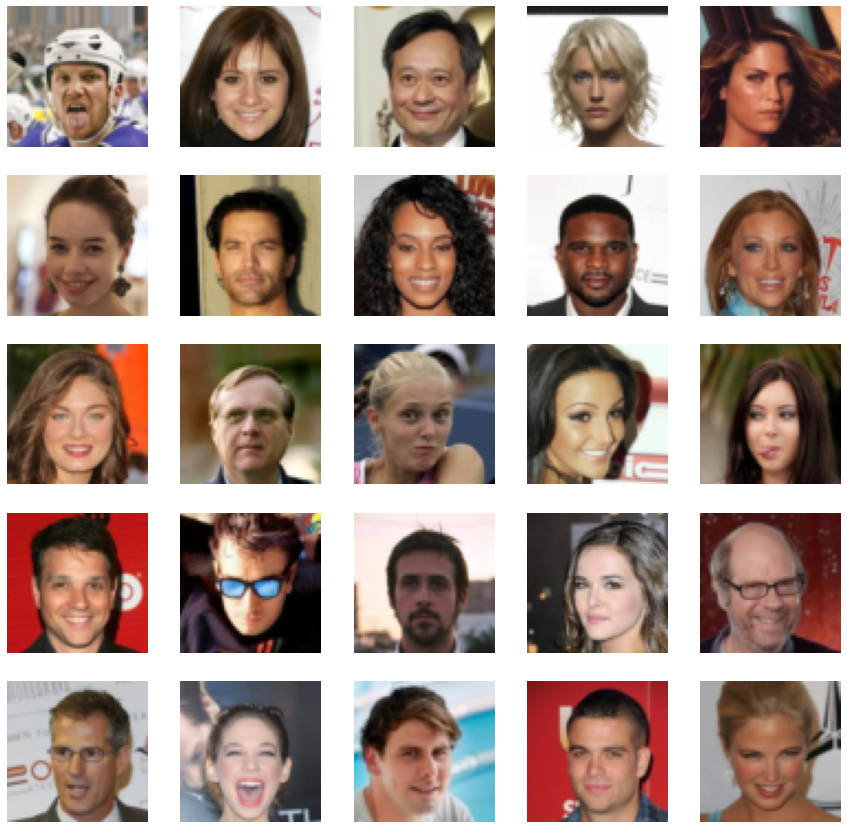

In [ ]:
plt.figure(figsize=(15, 15))

for i in range(25):
    img, attr = dataset[np.random.randint(len(dataset))]
    plt.subplot(5, 5, i + 1)
    plot_img(img, t_invnormalize)
plt.show()

### Задача 1 (3/10 балла). Обучите low-res StarGanV1 на ограниченном подмножестве аттрибутов



В рамках данного задания предлагается реализовать и обучить [StarGAN v1](https://arxiv.org/pdf/1711.09020.pdf) для генерации лиц с заданными аттрибутами

<img src='https://raw.githubusercontent.com/vpozdnyakov/DeepGenerativeModels/spring-2022/images/stargan_v1.png' width=600>

Вы можете добавлять любые дополнительные  параметры и использовать любые трюки для стабилизации/улучшения обучения на свое усмотрение. -->


In [ ]:
class Generator(nn.Module):
    def __init__(self, hidden_dim=32):
        """
        you can use any parameters here, for example ->
        hidden_dim: number of channels used in convs
        """
        super().__init__()
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

    def forward(self, x: Tensor, y: Tensor):
        """
        x: original image
        y: target domain
        """
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, hidden_dim=32):
        super().__init__()
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

    def forward(self, x: Tensor):
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

Дальше идут несколько вспомогательных клеточек которые вы можете использовать, а можете не использовать

In [ ]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, drop_last=True)

device = "cuda:0" if torch.cuda.is_available() else "cpu"

gen = Generator().to(device)
disc = Discriminator().to(device)

g_optim = None  # YOUR CODE
d_optim = None  # YOUR CODE

In [ ]:
def train_models(ckpt_file_path=None):
    ### BEGIN SOLUTION
    checkpoint = torch.load(ckpt_file_path, map_location=torch.device("cpu"))
    generator = Generator()
    generator.load_state_dict(checkpoint["generator"])
    ### END SOLUTION
    return generator

In [ ]:
plt.figure(figsize=(15, 15))

image, label = next(iter(dataloader))

image, label = image.to(device), label.to(device).float()
target_domain = label.flip(dims=[0])

fake_image = gen(image, target_domain)

for index in range(fake_image.shape[0]):
    if index >= 25:
        break
    image = fake_image[index].detach().cpu()
    plt.subplot(5, 5, index + 1)
    plot_img(image, t_invnormalize)
plt.show()

In [ ]:
from torchvision.utils import make_grid

test_iters = 1
gen.eval()

iter_loader = iter(dataloader)

for i in trange(test_iters):
    x_real, y_real = next(iter_loader)
    y_real = y_real.float()

    x_real, y_real = x_real.to(device), y_real.to(device)

    for label_index in range(10):

        y_trg = y_real.clone()
        y_trg[label_index] = 1 - y_trg[label_index]  # reverse

        print(f"Target domain: {attr_name[label_index]}")

        with torch.no_grad():
            x_fake = gen(x_real, y_trg)

        plt.figure(figsize=(25, 15))
        x_show = make_grid(torch.cat([x_real, x_fake], dim=0), nrow=x_fake.shape[0], normalize=False).detach().cpu()
        plot_img(x_show, t_invnormalize)
        plt.show()

Во время обучения вы можете считать FID вашей модели, но для автопроверки мы решили использовать LPIPS — [Learned Perceptual Image Patch Similarity](https://arxiv.org/abs/1801.03924) как финальную метрику качества. 

Точную цифру для получения баллов за задание мы сообщим позже

In [ ]:
# !pip install git+https://github.com/S-aiueo32/lpips-pytorch.git -q

from lpips_pytorch import LPIPS

lpips = LPIPS().to(device)


def evaluate_model(dataloader, generator):
    values = []
    for x_real, label in tqdm(dataloader):
        x_real, label = x_real.to(device), label.to(device).float()
        target_domain = label.flip(dims=[0])

        with torch.no_grad():
            x_fake = generator(x_real, target_domain)

        values.append(lpips(x_fake, x_real).squeeze().item())
    return np.mean(values)


evaluate_model(dataloader, gen)

### Задача 2 (5/10 баллов). Обучите low-res StarGanV2 на ограниченном подмножестве аттрибутов

В рамках второго задания предлагается реализовать и обучить [StarGAN v2](https://arxiv.org/abs/1912.01865)

<img src='https://raw.githubusercontent.com/vpozdnyakov/DeepGenerativeModels/spring-2022/images/stargan_v2.png' width=600>

Вы можете добавлять любые дополнительные  параметры на свое усмотрение.


In [ ]:
class Generator(nn.Module):
    def __init__(self, style_dim: int = 128, hidden_dim: int = 32, depth: int = 4):
        super().__init__()
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

    def forward(self, x, s=None, y=None):
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, hidden_dim: int = 32, depth: int = 4):
        super().__init__()
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

    def forward(self, x: Tensor, y: Tensor):
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

In [ ]:
class StyleEncoder(nn.Module):
    def __init__(self, style_dim: int = 64, hidden_dim: int = 32, depth: int = 4):
        super().__init__()
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

    def forward(self, x: Tensor, y: Tensor):
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

In [ ]:
class MappingNetwork(nn.Module):
    def __init__(self, latent_dim: int = 16, style_dim: int = 64):
        super().__init__()
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

    def forward(self, z: Tensor, y: Tensor):
        ### BEGIN SOLUTION
        pass
        ### END SOLUTION

In [ ]:
### BEGIN SOLUTION

style_enc = StyleEncoder().to(device)
mapping = MappingNetwork().to(device)
gen = Generator().to(device)
disc = Discriminator().to(device)

g_optim = None  # YOUR CODE
d_optim = None  # YOUR CODE
s_optim = None  # YOUR CODE
m_optim = None  # YOUR CODE

### END SOLUTION

In [ ]:
def train_models(ckpt_file_path):
    ### BEGIN SOLUTION
    checkpoint = torch.load(ckpt_file_path, map_location=torch.device("cpu"))
    generator = Generator()
    generator.load_state_dict(checkpoint["generator"])
    style_encoder = StyleEncoder()
    style_encoder.load_state_dict(checkpoint["style_encoder"])
    ### END SOLUTION
    return generator, style_encoder

In [ ]:
def evaluate_model_by_reference(dataloader, generator, style_encoder, latent_dim):
    values = []
    for x_real, label in tqdm(dataloader):
        x_real, label = x_real.to(device), label.to(device).float()
        x_ref = x_real.flip(dims=[0])
        target_domain = label.flip(dims=[0])

        with torch.no_grad():
            s_trg = style_encoder(x_ref, target_domain)
            x_fake = generator(x_real, s_trg)

        values.append(lpips(x_fake, x_real).squeeze().item())
    return np.mean(values)


evaluate_model(dataloader, gen)

### Задача 3 (2/10 балла). Дополнительный анализ

* Анализ латентного пространства и визуально качественный результат - **1+ балл**
1. Посмотрите получается ли у вас интерполяция в латентном пространстве
2. Покажите на каких доменах ваша модель работает хорошо, на каких не очень.
3. Попробуйте взять внешнюю картинку (не из селебы) и повторить результат.
4. Покажите самый смешной результат мультидоменной перекраски который у вас получался

* Текстовое ревью решения и предложения возможных улучшений - **1+ балл**
1. Опишите как вы решали задачу, какие методы описанные в статье вы использовали. Какие методы из других статей вы пробовали применять, что дало наибольший прирост в качестве?
2. Что бы вы предложили использовать еще, какие возможные улучшения здесь бы еще помогли получить бОльшее качество?


За хороший текст/результаты в этой задаче и за хорошее качество обученных моделей мы можем дать дополнительные баллы которые можно будет прибавить к другим домашкам :)

Эта задача выполняется отдельно и загружается в виде PDF в Anytask